### Import libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',None)


### Load the Data

In [3]:
store_data = pd.read_csv("cleaned_df_store.csv")
train_data = pd.read_csv("cleaned_df_train.csv")

In [4]:
# Now we merge store data n train data 

df_train_store = pd.merge(train_data.reset_index(),store_data,how='inner',on ='Store')

df_train_store['Date'] = pd.to_datetime(df_train_store['Date'])
df_train_store.info()
# df_train_store.head()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   index                      1017209 non-null  int64         
 1   Store                      1017209 non-null  int64         
 2   DayOfWeek                  1017209 non-null  int64         
 3   Date                       1017209 non-null  datetime64[ns]
 4   Sales                      1017209 non-null  float64       
 5   Customers                  1017209 non-null  float64       
 6   Open                       1017209 non-null  int64         
 7   Promo                      1017209 non-null  int64         
 8   StateHoliday               1017209 non-null  int64         
 9   SchoolHoliday              1017209 non-null  float64       
 10  StoreType                  1017209 non-null  int64         
 11  Assortment                 1017209 no

In [5]:
df_train_store.to_csv('merged.csv',index = False)

In [8]:
df = pd.read_csv('merged.csv',index_col ='Date',parse_dates =True)
# df.set_index('Date', inplace=True)

df.head()

,index,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,0,1,5,5263.0,555.0,1,1,0,0.0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,0,0,0
2015-07-30,1115,1,4,5020.0,546.0,1,1,0,0.0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,0,0,0
2015-07-29,2230,1,3,4782.0,523.0,1,1,0,0.0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,0,0,0
2015-07-28,3345,1,2,5011.0,560.0,1,1,0,0.0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,0,0,0
2015-07-27,4460,1,1,6102.0,612.0,1,1,0,0.0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,0,0,0


In [9]:
# # Indexing by Time:
# df_train_store['Date'] = pd.to_datetime(df_train_store['Date'])
# df_train_store.set_index('Date', inplace=True)
# df_train_store.head()

### Time -Series Analysis per Store Type

We take four stores from store types to represent their group: 
   * Store number 2 for StoreType A 
   * Store number 85 for StoreType B, 
   * Store number 1 for StoreType C 
   * Store number 13 for StoreType D. 
    
    
   It also makes sense to downsample the data from days to weeks using the resample method to see the present trends more clearly.

### Visualization

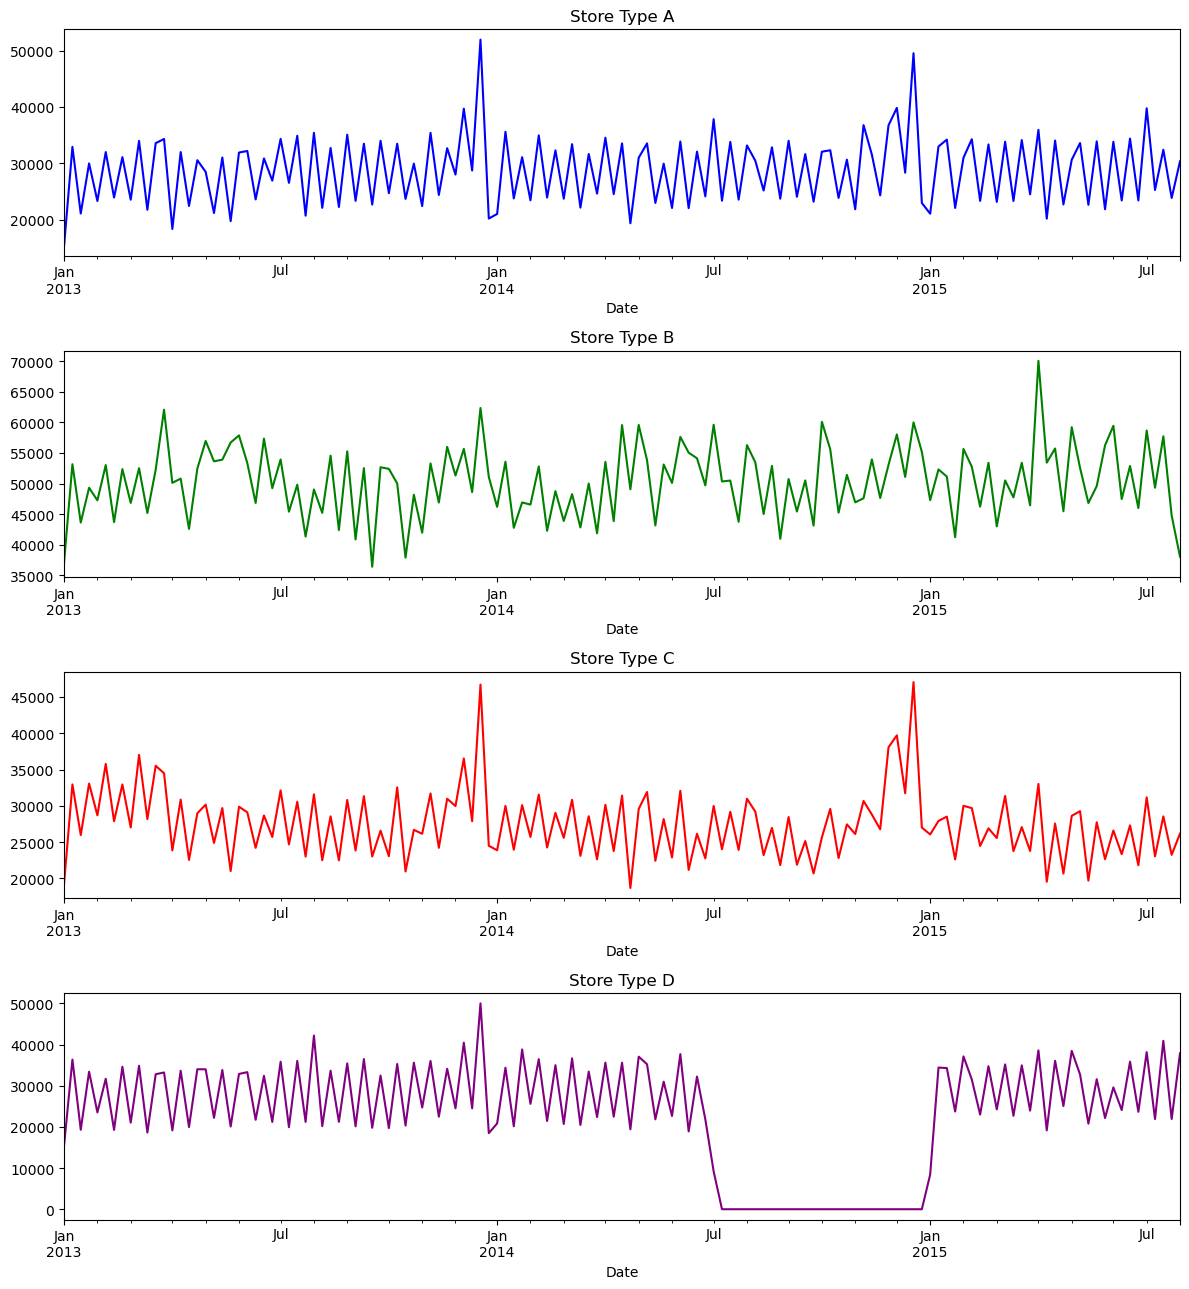

In [10]:
# Ensure 'Sales' column is of float type
df['Sales'] = df['Sales'] * 1.0

# Store types
sales_a = df[df['Store'] == 2]['Sales']
sales_b = df[df['Store'] == 85]['Sales'].sort_index(ascending=True)
sales_c = df[df['Store'] == 1]['Sales']
sales_d = df[df['Store'] == 13]['Sales']

# # Create subplots
f,(ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(12, 13))

# Plot weekly sales for each store type
sales_a.resample('W').sum().plot(color='blue', ax=ax1)
ax1.set_title('Store Type A')

sales_b.resample('W').sum().plot(color='green', ax=ax2)
ax2.set_title('Store Type B')

sales_c.resample('W').sum().plot(color='red', ax=ax3)
ax3.set_title('Store Type C')

sales_d.resample('W').sum().plot(color='purple', ax=ax4)
ax4.set_title('Store Type D')

# Adjust layout
plt.tight_layout()
plt.show()

Retail sales for StoreType A and C tend to peak for the Christmas season and then decline after the holidays. We might have seen the same trend for StoreType D (at the bottom) but there is no information from July 2014 to January 2015 about these stores as they were closed.

### Stationarity

Stationarity of Time Series

In order to use time series forecasting models, we need to ensure that our time series data is stationary i.e constant mean, constant variance and constant covariance with time.

There are 2 ways to test the stationarity of time series a) Rolling Mean: Visualization b) Dicky - Fuller test: Statistical test

a) Rolling Mean: A rolling analysis of a time series model is often used to assess the model's stability over time. The window is rolled (slid across the data) on a weekly basis, in which the average is taken on a weekly basis. Rolling Statistics is a visualization test, where we can compare the original data with the rolled data and check if the data is stationary or not.

b) Dicky -Fuller test: This test provides us the statistical data such as p-value to understand whether we can reject the null hypothesis. The null hypothesis is that data is not stationary and the alternative hypothesis says that data is stationary. If p-value is less than the critical value (say 0.5), we will reject the null hypothesis and say that data is stationary.

In [11]:
from statsmodels.tsa.stattools import adfuller

# Function to test the stationarity
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    roll_mean = timeseries.rolling(window=7).mean()
    roll_std = timeseries.rolling(window=7).std()

    # Plotting rolling statistics:
    orig = plt.plot(timeseries.resample('W').mean(), color='blue',label='Original')
    mean = plt.plot(roll_mean.resample('W').mean(), color='red', label='Rolling Mean')
    std = plt.plot(roll_std.resample('W').mean(), color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)
    
    # Performing Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
           print(key, value)
    

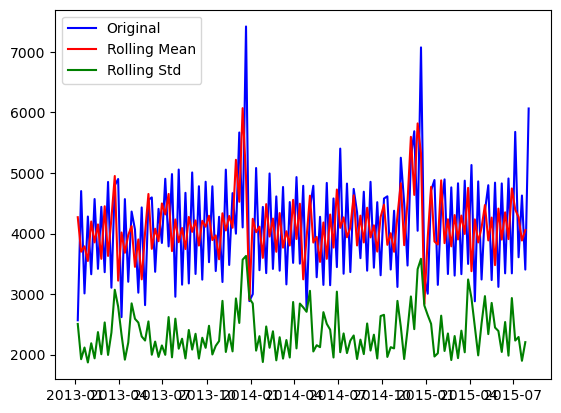

Results of Dickey-Fuller Test:
ADF Statistic: -6.218237
p-value: 0.000000
Critical Values:
1% -3.4374778690219956
5% -2.864686684217556
10% -2.5684454926748583


In [12]:
# Testing stationarity of store type a
test_stationarity(sales_a)

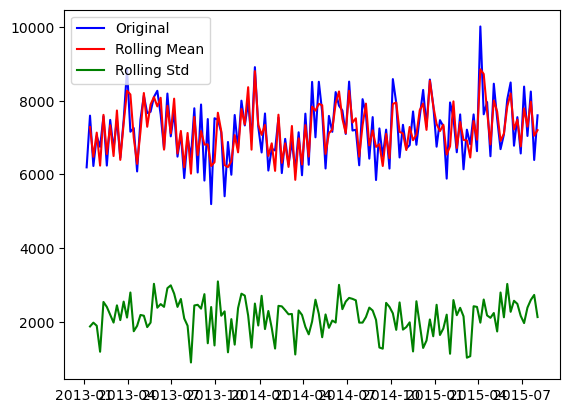

Results of Dickey-Fuller Test:
ADF Statistic: -5.657848
p-value: 0.000001
Critical Values:
1% -3.437485646962348
5% -2.8646901138095378
10% -2.568447319459459


In [13]:
#Testing stationarity of store type b
test_stationarity(sales_b)


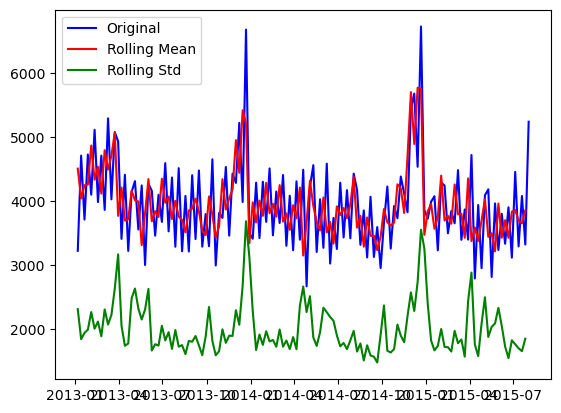

Results of Dickey-Fuller Test:
ADF Statistic: -4.374784
p-value: 0.000329
Critical Values:
1% -3.4374778690219956
5% -2.864686684217556
10% -2.5684454926748583


In [14]:
#Testing stationarity of store type c
test_stationarity(sales_c)


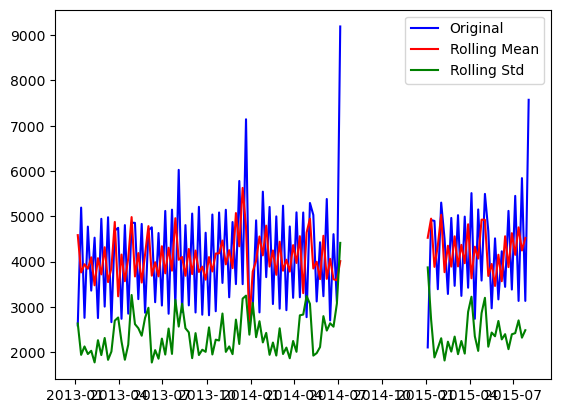

Results of Dickey-Fuller Test:
ADF Statistic: -6.237461
p-value: 0.000000
Critical Values:
1% -3.4392539652094154
5% -2.86546960465041
10% -2.5688625527782327


In [15]:
#Testing stationarity of store type d
test_stationarity(sales_d)


We can see from the above plots and statistical tests that mean and variation doesn't change much with time, i.e they are constant. Thus, we don't need to perform any transformation (needed when time series is not stationary).

Now, let's check the trend and seasonality in our data.

#### Seasonality And Trend

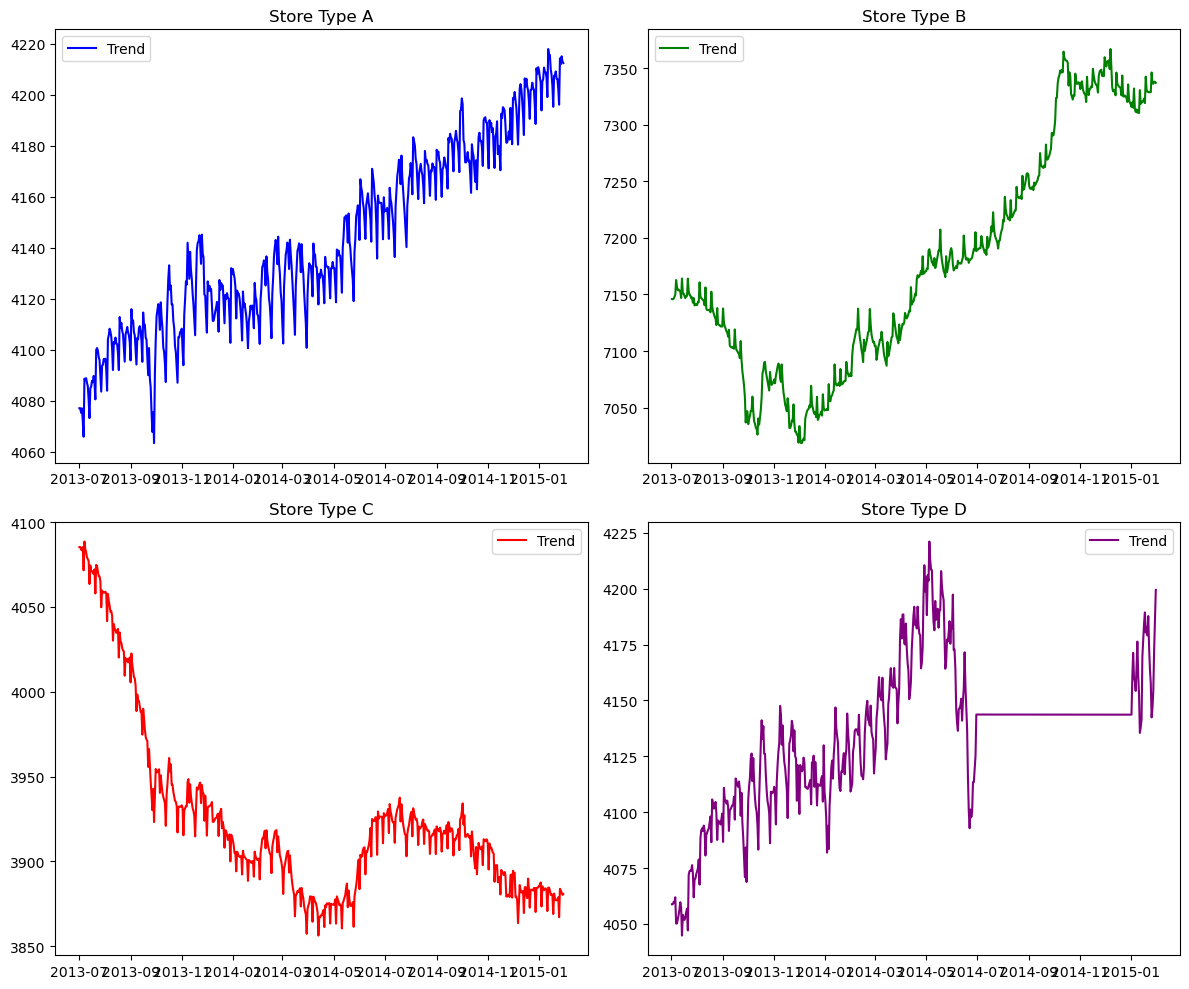

In [16]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'Sales' column is already prepared as a float type

# Store types
sales_a = df[df['Store'] == 2]['Sales']
sales_b = df[df['Store'] == 85]['Sales'].sort_index(ascending=True)
sales_c = df[df['Store'] == 1]['Sales']
sales_d = df[df['Store'] == 13]['Sales']

# Create subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))


# Apply seasonal decomposition and plot the trend using line plots
decomposition_a = seasonal_decompose(sales_a, model='additive', period=365)
ax1.plot(decomposition_a.trend.index, decomposition_a.trend.values, color='blue', label='Trend')
ax1.set_title('Store Type A')
ax1.legend()

decomposition_b = seasonal_decompose(sales_b, model='additive', period=365)
ax2.plot(decomposition_b.trend.index, decomposition_b.trend.values, color='green', label='Trend')
ax2.set_title('Store Type B')
ax2.legend()

decomposition_c = seasonal_decompose(sales_c, model='additive', period=365)
ax3.plot(decomposition_c.trend.index, decomposition_c.trend.values, color='red', label='Trend')
ax3.set_title('Store Type C')
ax3.legend()

decomposition_d = seasonal_decompose(sales_d, model='additive', period=365)
ax4.plot(decomposition_d.trend.index, decomposition_d.trend.values, color='purple', label='Trend')
ax4.set_title('Store Type D')
ax4.legend()

# Adjust layout
plt.tight_layout()
plt.show()

Observatio0n: Overall sales seems to increase, however not for the StoreType C (a third from the top). Eventhough the StoreType A is the most selling store type in the dataset, it seems that it can follow the same decresing trajectory as StoreType C did.

### Explore Seasonality and Residuals:

The next steps in time series analysis often involve exploring seasonality, residuals, and making predictions.

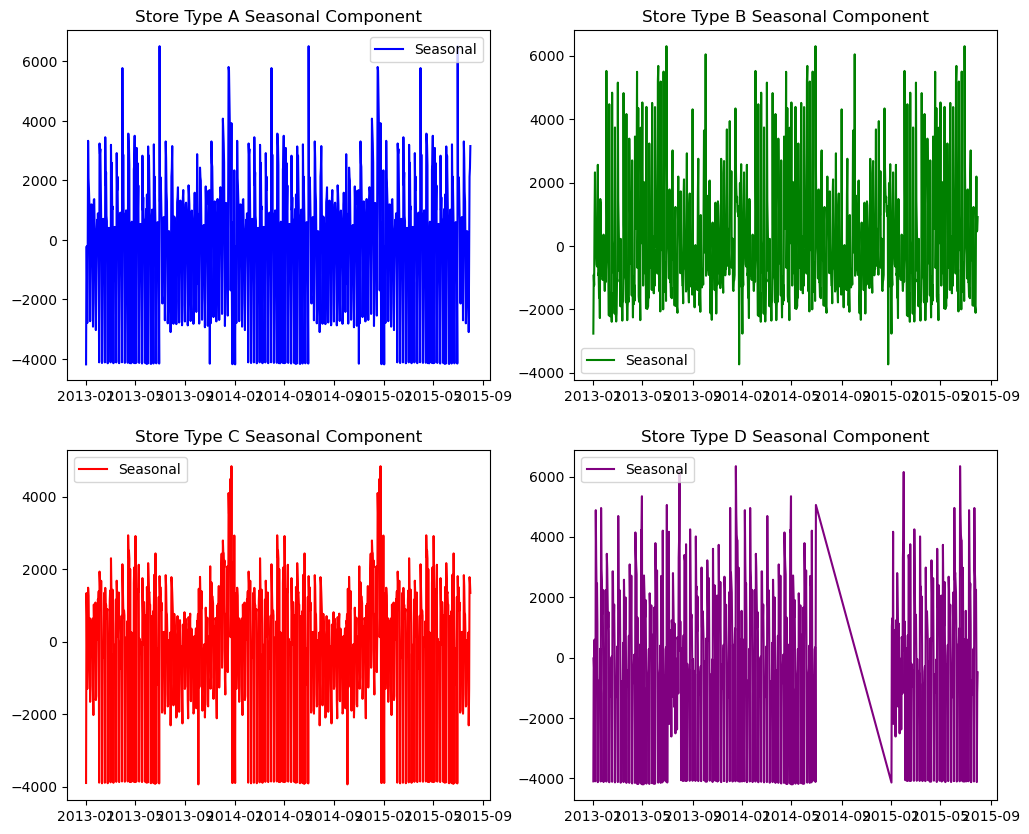

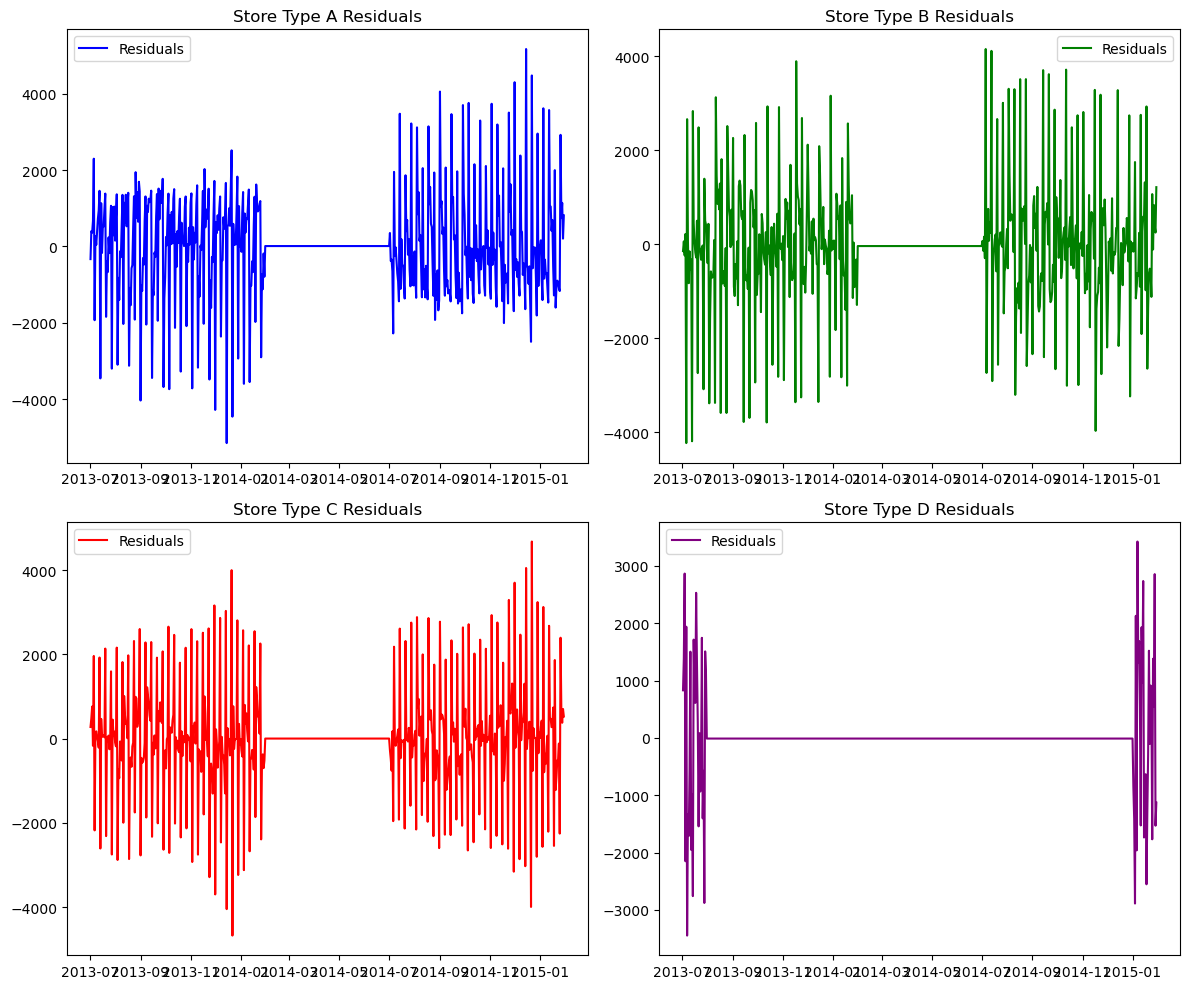

In [17]:
# Seasonal component
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

ax1.plot(decomposition_a.seasonal.index, decomposition_a.seasonal.values, color='blue', label='Seasonal')
ax1.set_title('Store Type A Seasonal Component')
ax1.legend()

ax2.plot(decomposition_b.seasonal.index, decomposition_b.seasonal.values, color='green', label='Seasonal')
ax2.set_title('Store Type B Seasonal Component')
ax2.legend()

ax3.plot(decomposition_c.seasonal.index, decomposition_c.seasonal.values, color='red', label='Seasonal')
ax3.set_title('Store Type C Seasonal Component')
ax3.legend()

ax4.plot(decomposition_d.seasonal.index, decomposition_d.seasonal.values, color='purple', label='Seasonal')
ax4.set_title('Store Type D Seasonal Component')
ax4.legend()

# Residuals
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

ax1.plot(decomposition_a.resid.index, decomposition_a.resid.values, color='blue', label='Residuals')
ax1.set_title('Store Type A Residuals')
ax1.legend()

ax2.plot(decomposition_b.resid.index, decomposition_b.resid.values, color='green', label='Residuals')
ax2.set_title('Store Type B Residuals')
ax2.legend()

ax3.plot(decomposition_c.resid.index, decomposition_c.resid.values, color='red', label='Residuals')
ax3.set_title('Store Type C Residuals')
ax3.legend()

ax4.plot(decomposition_d.resid.index, decomposition_d.resid.values, color='purple', label='Residuals')
ax4.set_title('Store Type D Residuals')
ax4.legend()

# Adjust layout
plt.tight_layout()
plt.show()


### Autocorrelaion

The next step in ourtime series analysis is to review Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.

Autocorrelation Function (ACF):

* ACF is used to identify the autocorrelation between the current observation and its past observations at different lags.
* It helps you understand the degree of correlation between a time series and its lagged values.
* ACF is useful in determining the order of the Moving Average (MA) component in an ARIMA model.

Partial Autocorrelation Function (PACF):

* PACF, on the other hand, helps identify the direct relationship between an observation and its lagged values, removing the indirect effects through shorter lags.
* PACF is useful in determining the order of the AutoRegressive (AR) component in an ARIMA model.
* It provides insights into the direct relationship between observations at different lags.


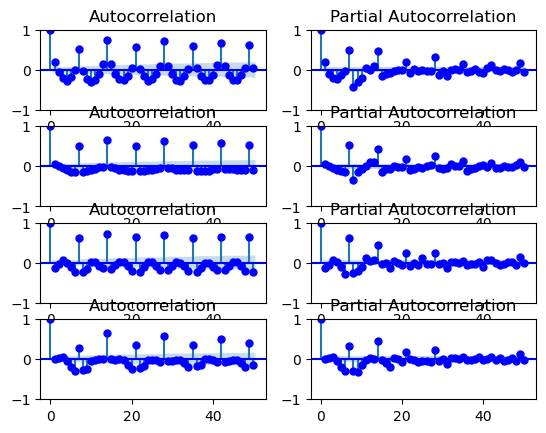

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# acf and pacf for A
plt.subplot(421); plot_acf(sales_a, lags = 50, ax = plt.gca(), color = 'blue')
plt.subplot(422); plot_pacf(sales_a, lags = 50, ax = plt.gca(), color = 'blue')

# acf and pacf for B
plt.subplot(423); plot_acf(sales_b, lags = 50, ax = plt.gca(), color = 'blue')
plt.subplot(424); plot_pacf(sales_b, lags = 50, ax = plt.gca(), color = 'blue')

# acf and pacf for C
plt.subplot(425); plot_acf(sales_c, lags = 50, ax = plt.gca(), color = 'blue')
plt.subplot(426); plot_pacf(sales_c, lags = 50, ax = plt.gca(), color ='blue')

# acf and pacf for D
plt.subplot(427); plot_acf(sales_d, lags = 50, ax = plt.gca(), color = 'blue')
plt.subplot(428); plot_pacf(sales_d, lags = 50, ax = plt.gca(), color = 'blue')

plt.show()

### Time Series Forecasting:

In [19]:
# from statsmodels.tsa.arima.model import ARIMA


# # Fit an ARIMA model to your data
# model = ARIMA(sales_a, order=(1, 0,1)) 
# model_fit = model.fit()

# # Forecast future values
# future_dates = pd.date_range(start=sales_a.index[-1], periods=6*7, freq='D')
# forecast = model_fit.get_forecast(steps=len(future_dates))
# forecast_index = forecast.index

# # Plot the forecasted values
# plt.figure(figsize=(12, 6))
# plt.plot(sales_a.index, sales_a.values, label='Observed')
# plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
# plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.2)
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.title('ARIMA Forecast')
# plt.legend()
# plt.show()

# # Print the forecasted values for the last 7 days
# # print(forecast.predicted_mean.tail(7))

In [20]:
# # # Example of ARIMA modeling for Store Type A
# from statsmodels.tsa.arima.model import ARIMA

# # Fit ARIMA model
# model_a = ARIMA(sales_a, order=(2, 2, 0))  # Specify appropriate p, d, q values
# results_a = model_a.fit()

# # Make predictions
# forecast_a = results_a.get_forecast(steps=10)

# # Access index and predicted values
# forecast_index = forecast_a.predicted_mean.index
# forecast_values = forecast_a.predicted_mean.values


# # Plot actual vs predicted
# plt.figure(figsize=(10, 6))
# plt.plot(sales_a.index, sales_a.values, label='Actual', color='blue')
# plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
# plt.xlabel('Time')
# plt.ylabel('Sales')
# plt.title('ARIMA Forecast for Store Type A')
# plt.legend()
# plt.show()


In [21]:
data = df.groupby("Date").agg({"Sales":"mean"})
data.head()

,Sales
Date,
2013-01-01,76.857271
2013-01-02,6050.476233
2013-01-03,5577.322870
2013-01-04,5832.756054
2013-01-05,5178.539910


### Plot Sales

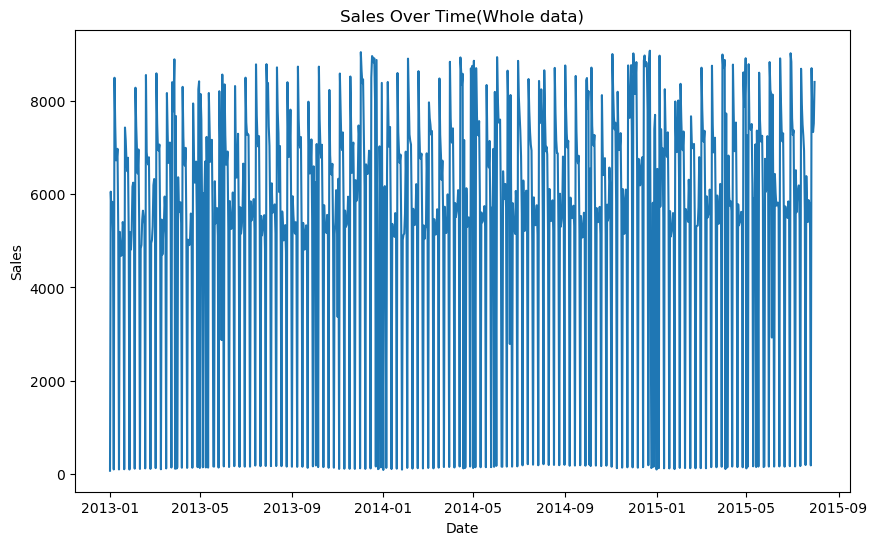

In [22]:
# Visualization:
#  Plot sales over time

plt.figure(figsize=(10,6))
plt.plot(data['Sales'])
plt.title('Sales Over Time(Whole data)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


#### Plot Sales (One Month)

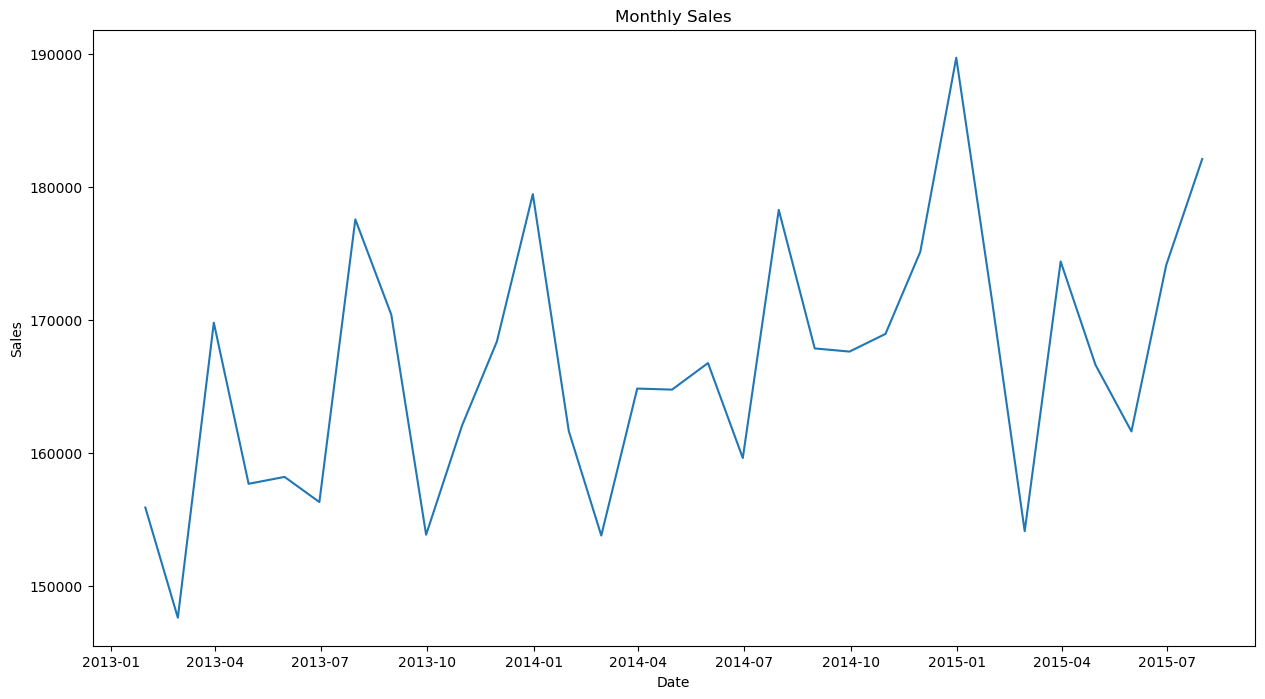

In [23]:
# Resample daily data to monthly
monthly_sales = data['Sales'].resample('M').sum()

# Plot monthly sales
plt.figure(figsize=(15, 8))
plt.plot(monthly_sales)
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


### Plot Sales (One Year)

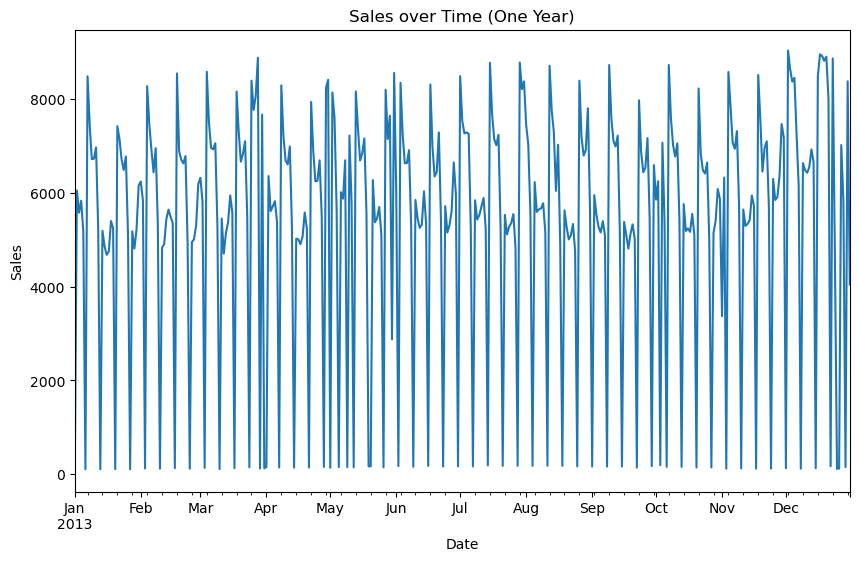

In [24]:
plt.figure(figsize=(10, 6))
data['Sales'][:365].plot()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales over Time (One Year)')
plt.show()




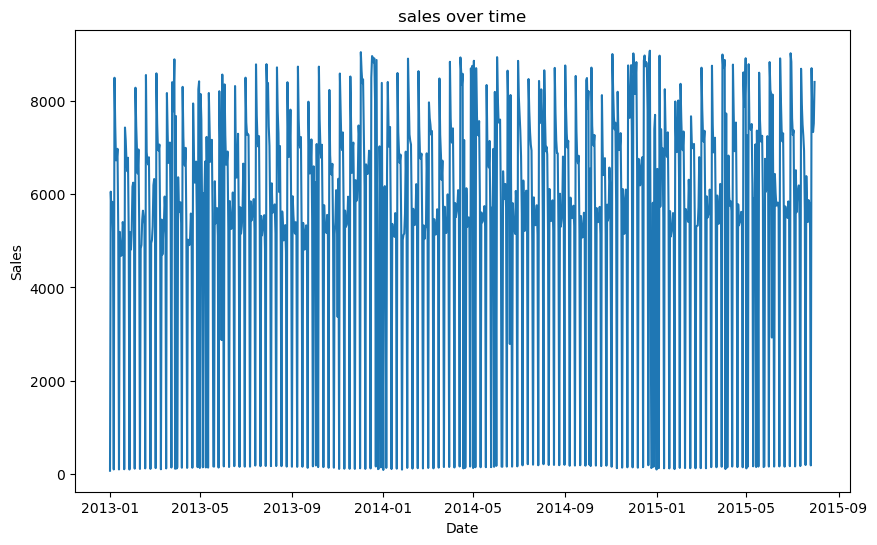

In [25]:
# Visualize the time series data
plt.figure(figsize=(10,6))
plt.plot(data)
plt.title("sales over time")
plt.xlabel("Date")
plt.ylabel('Sales')
plt.show()

### Check for the stationarity



In [26]:
# test_result =adfuller(data['Sales'])

# def adfuller_test(sales):
#     result = adfuller(sales)
#     labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
#     for value,label in zip(result,labels):
#         print(label+' : '+str(value) )
#     if result[1] <= 0.05:
#         print("strong evidence aganist the null hypothesis(Ho),reject the null hyopthesis")
#     else:
#         print("weak evidence against null hyothesis,time series has a unit root,indicating it is non-stationary")
        
     

In [27]:
# adfuller_test(data['Sales'])

In [28]:
# # Use the Augumented Dicky-Fuller test
def check_stationarity(timeseries):
  # perform the dickey fuller test
  result = adfuller(timeseries, autolag='AIC')

  # Display the results
  print('ADF Statistics:', result[0])
  print('p-value:', result[1])
  print('Critical Values:', result[4])


  # Interprest the results
  if result[1] <= 0.05:
    print('The time series data is stationary')
  else:
    print('The time series data is not stationary')

# Check the stationarity
check_stationarity(data['Sales'])

ADF Statistics: -6.005160393292821
p-value: 1.6220661626191228e-07
Critical Values: {'1%': -3.4374778690219956, '5%': -2.864686684217556, '10%': -2.5684454926748583}
The time series data is stationary


#### Decompose the time series

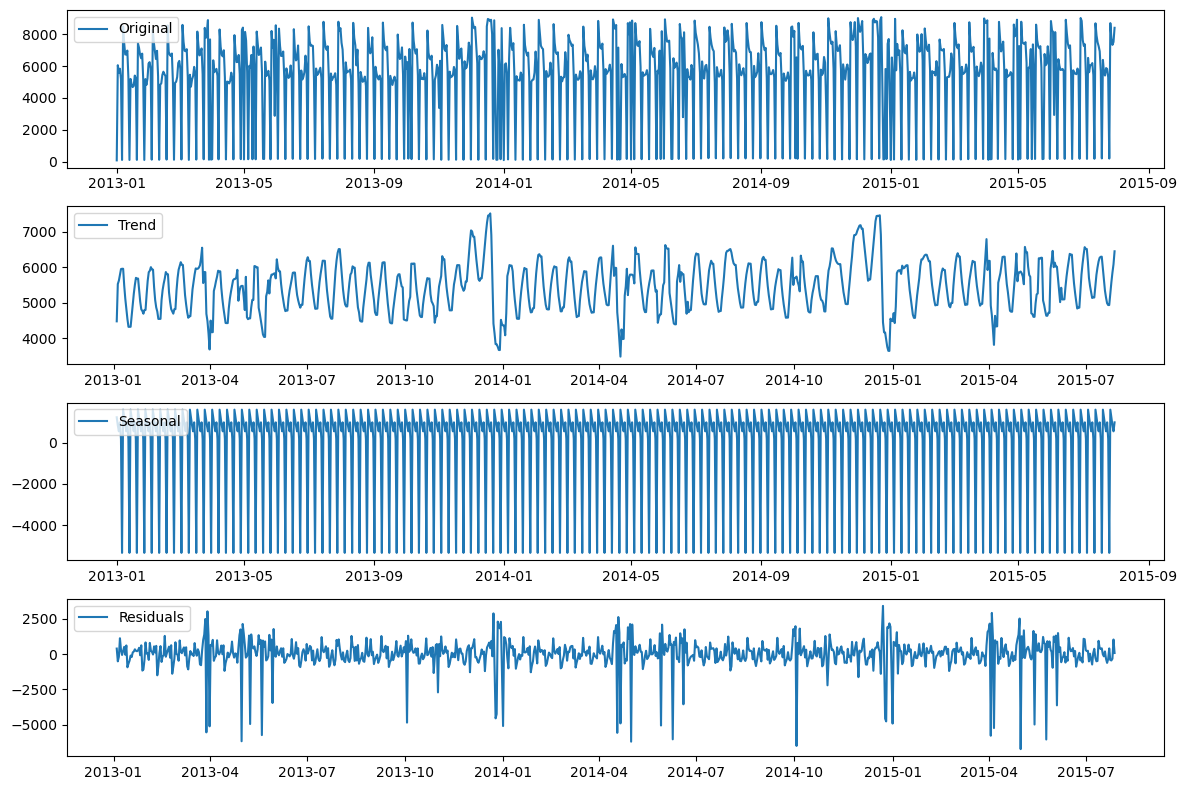

In [29]:
import statsmodels.api as sm
# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(data['Sales'], model = 'additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(12,8))

plt.subplot(411)
plt.plot(data['Sales'], label="Original")
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

### Autocorrelaion

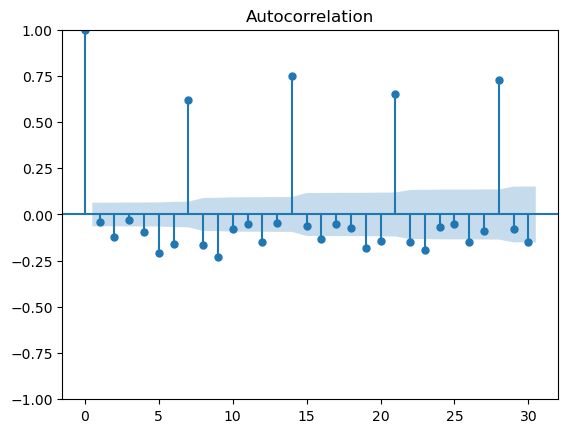

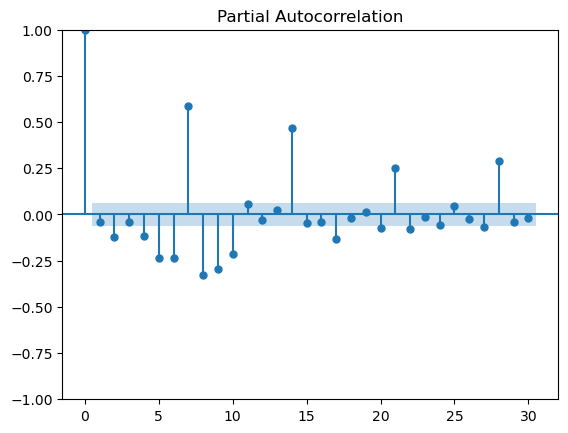

In [30]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

acf = plot_acf(data['Sales'].dropna())

pacf = plot_pacf(data['Sales'].dropna())


# # Check for autocorrelation and partial autocorrelation
# def plot_acf_pacf(data):
#     plot_acf(data, lags=50)
#     plt.show()
#     plot_pacf(data, lags=50)
#     plt.show()

# plot_acf_pacf(time_series_data['Sales'])

In [31]:
df.head()

,index,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,0,1,5,5263.0,555.0,1,1,0,0.0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,0,0,0
2015-07-30,1115,1,4,5020.0,546.0,1,1,0,0.0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,0,0,0
2015-07-29,2230,1,3,4782.0,523.0,1,1,0,0.0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,0,0,0
2015-07-28,3345,1,2,5011.0,560.0,1,1,0,0.0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,0,0,0
2015-07-27,4460,1,1,6102.0,612.0,1,1,0,0.0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,0,0,0


In [36]:
# Set the percentage of data to be used for training (e.g., 80%)
train_percent = 0.8

# Calculate the index to split the data
split_index = int(len(data) * train_percent)

# Split the data into training and testing sets
train_data = data['Sales'][:split_index]
test_data = data['Sales'][split_index:]

# Display the number of observations in each set
print("Number of observations in the training set:", len(train_data))
print("Number of observations in the testing set:", len(test_data))

Number of observations in the training set: 753
Number of observations in the testing set: 189


In [40]:
train_data.head()

Date
2013-01-01      76.857271
2013-01-02    6050.476233
2013-01-03    5577.322870
2013-01-04    5832.756054
2013-01-05    5178.539910
Name: Sales, dtype: float64

In [33]:
#  # Create the train and test splits the right way for time series data
# split_size = int(0.8 * len(prices)) # 80 % for training

# # Create train data splits
# X_train, y_train = df[:split_size], prices[:split_size]

# # Create the test split
# X_test, y_test = timesteps[split_size:], prices[split_size:]

# len(X_train), len(X_test), len(y_train), len(y_test)

In [43]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


C:\Users\VARUN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\VARUN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\VARUN\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  753
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6990.062
Date:                Fri, 19 Jan 2024   AIC                          13986.123
Time:                        18:09:18   BIC                          13999.991
Sample:                    01-01-2013   HQIC                         13991.466
                         - 01-23-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0276      0.038     -0.729      0.466      -0.102       0.047
ma.L1         -1.0000      0.053    -18.785      0.000      -1.104      -0.896
sigma2       6.88e+06   7.68e-09   8.96e+14      0.0

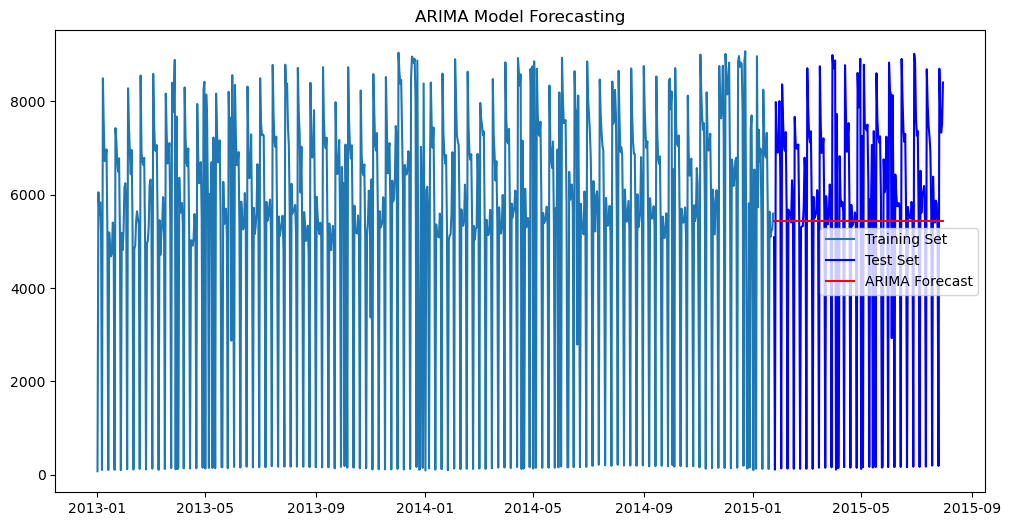

Mean Squared Error (MSE) on the test set: 7201340.097031935


In [44]:
# Define the order of the ARIMA model (p, d, q)
p = 1  # AR order
d = 1  # Differencing order
q = 1  # MA order

# Fit the ARIMA model
arima_model = ARIMA(train_data, order=(p, d, q))
arima_result = arima_model.fit()

# Display model summary
print(arima_result.summary())

# Forecast using the trained ARIMA model on the testing set
forecast_values = arima_result.get_forecast(steps=len(test_data))
forecast_mean = forecast_values.predicted_mean

# Plot the actual vs. predicted values on the testing set
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Set')
plt.plot(test_data, label='Test Set', color='blue')
plt.plot(forecast_mean, label='ARIMA Forecast', color='red')
plt.legend()
plt.title('ARIMA Model Forecasting')
plt.show()

# Evaluate the model performance using Mean Squared Error (MSE)
mse = mean_squared_error(test_data, forecast_mean)
print("Mean Squared Error (MSE) on the test set:", mse)

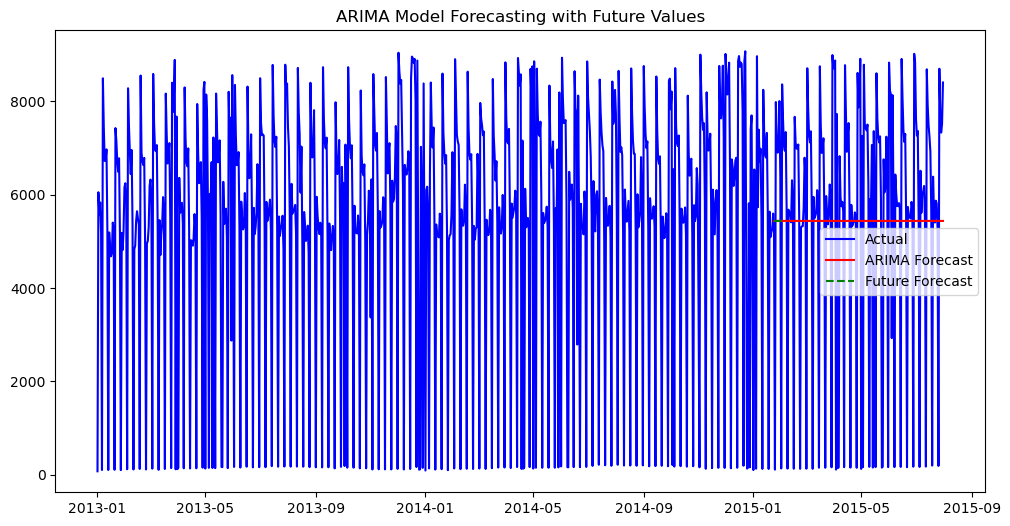

In [45]:
# Forecast future values
forecast_steps = 12  # Adjust as needed
future_forecast = arima_result.get_forecast(steps=forecast_steps)
future_mean = future_forecast.predicted_mean

# Plot the actual, forecasted, and future values
plt.figure(figsize=(12, 6))
plt.plot(data['Sales'], label='Actual', color='blue')
plt.plot(forecast_mean, label='ARIMA Forecast', color='red')
plt.plot(future_mean, label='Future Forecast', color='green', linestyle='dashed')
plt.legend()
plt.title('ARIMA Model Forecasting with Future Values')
plt.show()

In [38]:
index =data.loc['2013-01-01' :'2015-07-31'].index
index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2015-07-22', '2015-07-23', '2015-07-24', '2015-07-25',
               '2015-07-26', '2015-07-27', '2015-07-28', '2015-07-29',
               '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', name='Date', length=942, freq=None)

In [35]:
sales = data.loc['2013-01-01':'2015-07-31']['Sales']
sales.head(20)

Date
2013-01-01      76.857271
2013-01-02    6050.476233
2013-01-03    5577.322870
2013-01-04    5832.756054
2013-01-05    5178.539910
2013-01-06     104.294170
2013-01-07    8489.242152
2013-01-08    7448.995516
2013-01-09    6721.556054
2013-01-10    6729.028700
2013-01-11    6968.339910
2013-01-12    5236.061883
2013-01-13     104.413453
2013-01-14    5190.397309
2013-01-15    4857.583857
2013-01-16    4678.116592
2013-01-17    4752.328251
2013-01-18    5400.104933
2013-01-19    5244.789238
2013-01-20     108.554260
Name: Sales, dtype: float64

In [42]:
import matplotlib.pyplot  as plt
%matplotlib inline

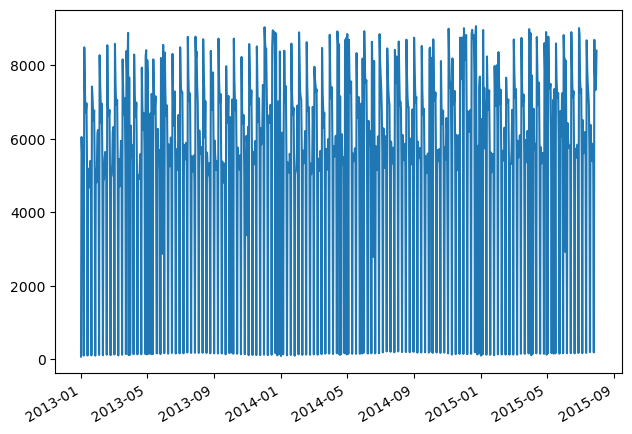

In [48]:
figure,axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index,sales)